In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_full= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2020_VBDI_BML/data/data_full.csv', encoding='utf-8')

In [ ]:
data_full.head()

,Unnamed: 0,NewsId,Ticker,NewsTitle,NewsFullContent,PublicDate
0,0,134305,BID,BIDV chậm niêm yết và những hệ lụy,"Tháng trước, khi NH Đầu tư và Phát triển VN (B...",2012-06-25 21:04:00
1,1,143314,BID,Phát hành thành công 2.030 tỷ đồng trái phiếu,Ngân hàng TMCP Đầu tư và Phát triển Việt Nam (...,2012-08-04 13:24:00
2,2,145873,BID,"BIDV nợ xấu cuối tháng 6 chiếm 2,97%",Ngân hàng TMCP Đầu tư và Phát triển Việt Nam (...,2012-08-14 16:11:00
3,3,146305,BID,BIDV lãi hợp nhất 1.274 tỷ đồng trong 2 tháng,Ngân hàng thương mại cổ phần đầu tư và phát tr...,2012-08-16 10:21:00
4,4,153747,BID,"BIDV được chấp thuận niêm yết 2,3 tỷ cổ phiếu",Sở giao dịch chứng khoán TP.HCM đã chấp thuận ...,2012-10-10 13:56:00


In [ ]:
data_full['word_count'] = data_full['NewsFullContent'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
data_full[['NewsFullContent','word_count']].head()

,NewsFullContent,word_count
0,"Tháng trước, khi NH Đầu tư và Phát triển VN (B...",1181
1,Ngân hàng TMCP Đầu tư và Phát triển Việt Nam (...,284
2,Ngân hàng TMCP Đầu tư và Phát triển Việt Nam (...,302
3,Ngân hàng thương mại cổ phần đầu tư và phát tr...,381
4,Sở giao dịch chứng khoán TP.HCM đã chấp thuận ...,137


In [ ]:
data_full.word_count.describe()

count    16193.000000
mean       147.629593
std        249.423677
min          1.000000
25%         35.000000
50%         67.000000
75%        126.000000
max       4283.000000
Name: word_count, dtype: float64

In [ ]:
!pip install underthesea

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import codecs
from underthesea import word_tokenize

In [ ]:

path ='/content/drive/MyDrive/Colab Notebooks/2020_VBDI_BML/data/vietnamese-stopwords.txt'

def create_stopwordlist():
    f = codecs.open(path, encoding='utf-8')
    data = []
    null_data = []
    for i, line in enumerate(f):
        line = repr(line)
        line = line[1:len(line)-3]
        data.append(line)
    return data

In [ ]:
stopword_vn = create_stopwordlist()

In [ ]:
import string

def tokenize(text):
    text =  text.translate(str.maketrans('', '', string.punctuation))
    return [word for word in word_tokenize(text.lower()) if word not in stopword_vn]

In [ ]:
corpus = []
for i in range(data_full.shape[0]):
    #Remove punctuations
    text = str(data_full['NewsFullContent'][i])
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stopword_vn] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
print(corpus[:20])

['nh đầu tư phát triển vn bidv thông báo chốt danh sách cổ đông lưu ký ck nộp hồ sơ niêm yết hose nđt nh thức chào sàn ngườirất ngạc nhiêntrước thông bidv hoãn niêm yết quý iii hứa gió baydễ hệ lụy xuất hiện bidv niêm yết bao tham gia đấu giá bidv đợt ipo ngoái tiếp tục ôm cp thời gian đồng nghĩa vốn tiếp tục chôn thời hiện bidv thị trường otc ngoái triệu cp bidv giá bình quân đồng cp tương ứng tiền thu tỷ đồng bidv sàn dòng tiền thể bổ sung thị trường bidv hệ lụy dừng bàn trùng hợp ngân hàng tmcp sở hữu cổ chi phối vietcombank vcb vietinbank ctg bidv tiến hành sàn trúng thời thuận lợi vcb ctg niêm yết ttck phục hồi giai đoạn quý ii đầu quý iii thời vcb ctg chào sàn hose ttck quãng nghỉ giai đoạn giá niêm yết vcb nửa giá bình quân đợt ipo lãnh đạo ctg giá chào sàn ctg lẽ thể ttck diễn biến sức sống nđt chán ngán thời đẹp sàn quan trọng lệ ghi nỗ lực bidv định niêm yết giả sử bidv niêm yết quãng thời gian ipo niêm yết vcb kiến bidv niêm yết vcb ctg lợi học kinh nghiệm chủ động niêm yết 

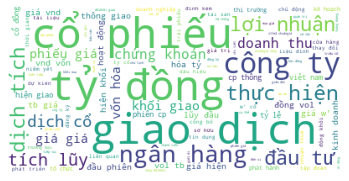

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopword_vn,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(stop_words=stopword_vn, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bao', 'bay', 'biến', 'biệt', 'bây', 'bõm', 'bảo', 'bất', 'bẩy', 'bập', 'bắt', 'bội', 'chao', 'chi', 'chia', 'chu', 'chui', 'chuẩn', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'coi', 'cu', 'cá', 'câu', 'cóc', 'công', 'cạnh', 'cảm', 'cầu', 'cật', 'cắt', 'cổ', 'cụ', 'cục', 'cực', 'da', 'dà', 'dĩ', 'dưng', 'dần', 'dầu', 'dịp', 'dở', 'dụng', 'gian', 'giá', 'giác', 'giời', 'ha', 'hiện', 'hoàn', 'hèn', 'hình', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hỗ', 'hội', 'hợp', 'hự', 'khói', 'khô', 'khăn', 'khắc', 'khẳng', 'kia', 'kiện', 'kê', 'kì', 'kìa', 'kỳ', 'lai', 'le', 'liên', 'liệt', 'loạt', 'luận', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lập', 'lẽ', 'lị', 'lự', 'lực', 'mày', 'mòi', 'mù', 'mạng',

In [ ]:
list(cv.vocabulary_.keys())[:10]

['nh', 'đầu', 'tư', 'phát', 'triển', 'vn', 'bidv', 'thông', 'báo', 'chốt']

               Tri-gram  Freq
0        giao dịch tích  6537
1         dịch tích lũy  6134
2          giao dịch cổ  5592
3         dịch cổ phiếu  5538
4        khối giao dịch  5145
5          cổ phiếu giá  4865
6       thông giao dịch  4717
7            vốn hóa tỷ  4693
8           hóa tỷ đồng  4684
9         phiếu giá vnd  4659
10          giá vnd vốn  4659
11          vnd vốn hóa  4659
12          tỷ đồng vol  4659
13          đồng vol tb  4659
14           vol tb giá  4659
15           tb giá giá  4659
16         tích lũy đầu  4591
17        giá hiện khối  4590
18       hiện khối giao  4590
19        lũy đầu phiên  4590
20         đầu phiên cp  4580
21       phiên cp thông  4479
22        cp thông giao  4479
23       hiện giao dịch  4310
24       thực hiện giao  4065
25       lợi nhuận thuế  2742
26        tài liệu đính  2506
27        liệu đính kèm  2482
28        chủ động khối  2196
29  sttmã cksàngiá thay  1954


[Text(0, 0, 'giao dịch tích'),
 Text(0, 0, 'dịch tích lũy'),
 Text(0, 0, 'giao dịch cổ'),
 Text(0, 0, 'dịch cổ phiếu'),
 Text(0, 0, 'khối giao dịch'),
 Text(0, 0, 'cổ phiếu giá'),
 Text(0, 0, 'thông giao dịch'),
 Text(0, 0, 'vốn hóa tỷ'),
 Text(0, 0, 'hóa tỷ đồng'),
 Text(0, 0, 'phiếu giá vnd'),
 Text(0, 0, 'giá vnd vốn'),
 Text(0, 0, 'vnd vốn hóa'),
 Text(0, 0, 'tỷ đồng vol'),
 Text(0, 0, 'đồng vol tb'),
 Text(0, 0, 'vol tb giá'),
 Text(0, 0, 'tb giá giá'),
 Text(0, 0, 'tích lũy đầu'),
 Text(0, 0, 'giá hiện khối'),
 Text(0, 0, 'hiện khối giao'),
 Text(0, 0, 'lũy đầu phiên'),
 Text(0, 0, 'đầu phiên cp'),
 Text(0, 0, 'phiên cp thông'),
 Text(0, 0, 'cp thông giao'),
 Text(0, 0, 'hiện giao dịch'),
 Text(0, 0, 'thực hiện giao'),
 Text(0, 0, 'lợi nhuận thuế'),
 Text(0, 0, 'tài liệu đính'),
 Text(0, 0, 'liệu đính kèm'),
 Text(0, 0, 'chủ động khối'),
 Text(0, 0, 'sttmã cksàngiá thay')]

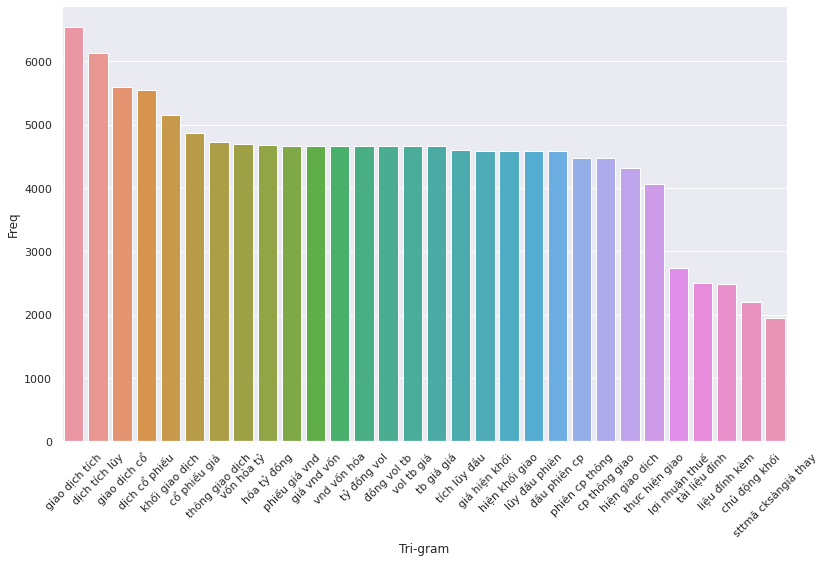

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=30)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from underthesea import pos_tag, chunk, word_tokenize

from nltk import RegexpParser, Tree

NP = "NP: {<N.*>? <V*> <N.*>? <A*>}"
chunker = RegexpParser(NP)
def get_continuous_chunks(text, chunk_func=chunker.parse):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords]
    filter_sent = (" ").join(tokens_without_sw)
    chunked = chunk_func(pos_tag(filter_sent))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk

TypeError: ignored